Завдання (крок за кроком)

Для цієї задачі необхідно буде завантажити набір даних ESC-50, як це було зроблено в конспекті.



Для виконання завдання необхідно виконати такі кроки:

1. Для зменшення обсягу даних зробити вибірку звуків із мітками 'dog' та 'chirping_birds'.

2. За допомогою наведеної в конспекті функції spectrogram згенерувати матрицю спектрограми.

3. Використати функцію pooling для узагальнення та зменшення розміру спектрограми.

4. За допомогою методу flaten() перетворити матрицю спектрограми у вектор для подальшого спектрального аналізу.

5. Використати функцію SpectralClustering бібліотеки sklearn для кластеризації отриманих даних (аналогічно до ДЗ теми №1).

6. Проаналізувати отримані кластери. Чи потрапили в різні кластери звуки різного походження?

7. Зробити висновок про значення застосування перетворення Фур'є для вилучення ознак даних.

Для виконання завдання використовуй функції numpy та алгоритми з конспекту до цієї теми.

In [160]:
import os
import librosa
import zipfile
from urllib.request import urlretrieve
from IPython.display import Audio

# Завантаження та розархівування датасету
url = "https://github.com/karoldvl/ESC-50/archive/master.zip"
zip_file_path = "ESC-50-master.zip"
download_path = "./ESC-50-master/"
if not os.path.exists(download_path):
    urlretrieve(url, zip_file_path)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    os.remove(zip_file_path)

In [161]:
import pandas as pd
# Read CSV file ... meta/esc50.csv
df_file_path = os.path.join(download_path, "ESC-50-master/meta", "esc50.csv")
df = pd.read_csv(df_file_path)
df.head(5)
# print(df.shape)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [162]:
# Завантаження аудіофайлу за допомогою librosa
dog_back_file = os.path.join(download_path, "ESC-50-master/audio", "1-100032-A-0.wav")
y, sr = librosa.load(dog_back_file, sr=None)

# Виведення інформації про аудіо
print(f"Завантажено аудіо файл: {dog_back_file}")
print(f"Довжина аудіо: {len(y)} зразків")
print(f"Частота дискретизації: {sr} Гц")

Audio(dog_back_file)

Завантажено аудіо файл: ./ESC-50-master/ESC-50-master/audio/1-100032-A-0.wav
Довжина аудіо: 220500 зразків
Частота дискретизації: 44100 Гц


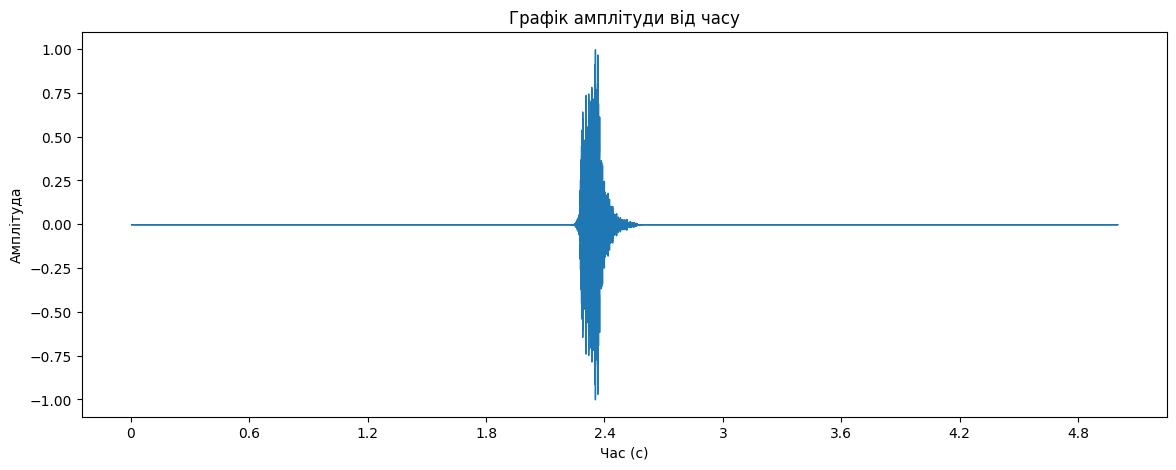

In [163]:
import librosa.display
import matplotlib.pyplot as plt

# Зображення графіка амплітуди від часу
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Графік амплітуди від часу')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.show()


In [164]:
# Завантаження аудіофайлу за допомогою librosa
chirping_birds_file = os.path.join(download_path, "ESC-50-master/audio", "1-100038-A-14.wav")
y2, sr2 = librosa.load(chirping_birds_file, sr=None)

# Виведення інформації про аудіо
print(f"Завантажено аудіо файл: {chirping_birds_file}")
print(f"Довжина аудіо: {len(y2)} зразків")
print(f"Частота дискретизації: {sr2} Гц")

Audio(chirping_birds_file)

Завантажено аудіо файл: ./ESC-50-master/ESC-50-master/audio/1-100038-A-14.wav
Довжина аудіо: 220500 зразків
Частота дискретизації: 44100 Гц


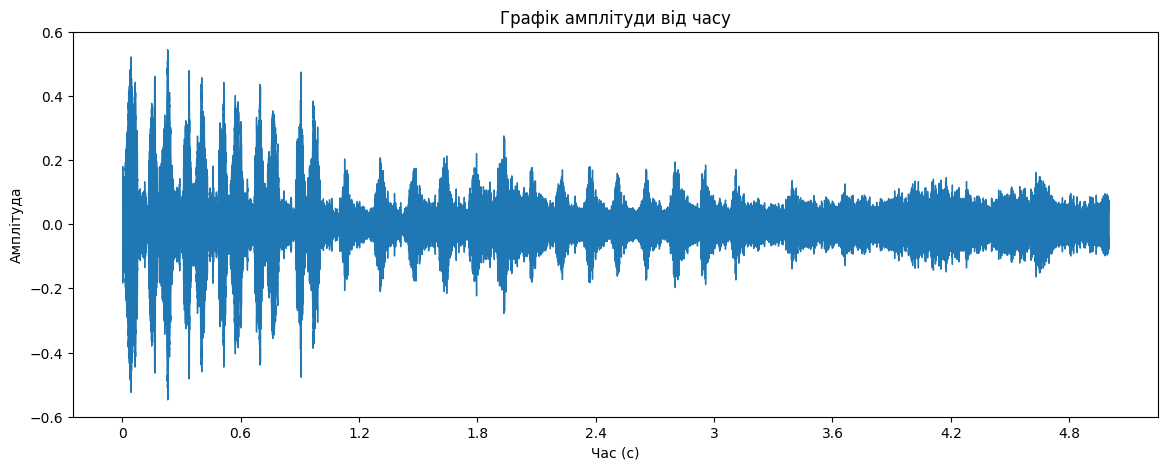

In [165]:
import librosa.display
import matplotlib.pyplot as plt

# Зображення графіка амплітуди від часу
plt.figure(figsize=(14, 5))
librosa.display.waveshow((y2), sr=sr2)
plt.title('Графік амплітуди від часу')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.show()

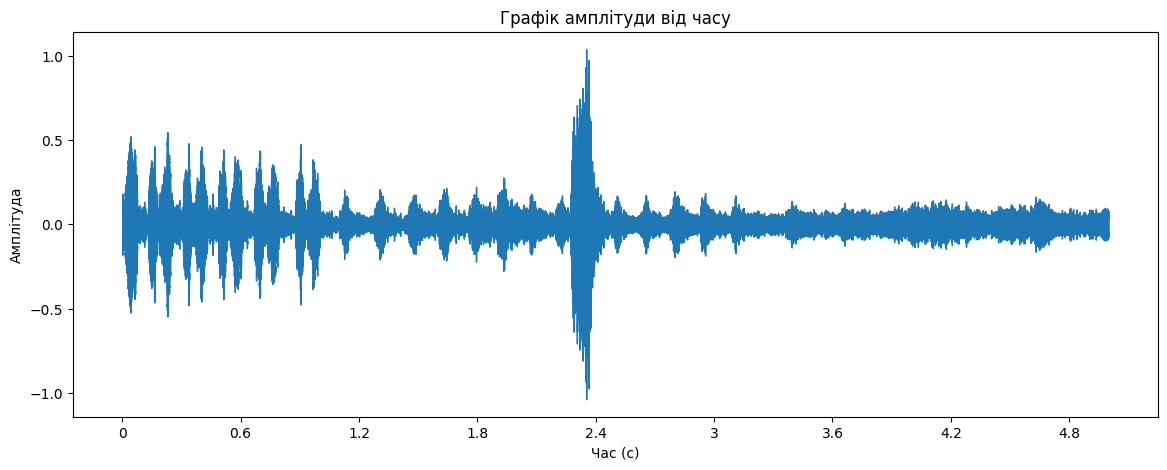

In [166]:
# Об'єднання обох звуків
y_join = y + y2
# Зображення графіка амплітуди від часу
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_join, sr=sr)
plt.title('Графік амплітуди від часу')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.show()

In [167]:
# Спроба зробити аудіо з об'єднаного масиву (невдала)
import numpy as np
from scipy.io.wavfile import write
print(' y:', y)
print('y2:',y2)
print('y_join:',y_join)

y_join_int16 = np.int16(y_join / np.max(np.abs(y_join)) * 32767)    # 32767
write('output_audio.wav', sr, y_join_int16)

Audio(chirping_birds_file)

 y: [0. 0. 0. ... 0. 0. 0.]
y2: [-0.01184082 -0.10336304 -0.14141846 ...  0.06985474  0.04049683
  0.00274658]
y_join: [-0.01184082 -0.10336304 -0.14141846 ...  0.06985474  0.04049683
  0.00274658]


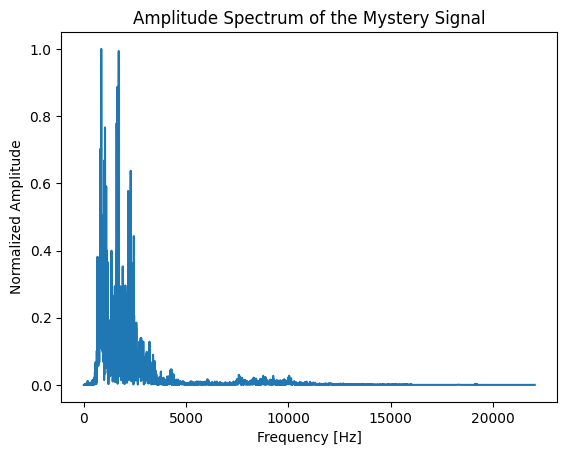

Dominant Frequencies:  [801.  801.2 801.4 801.6 801.8]


In [168]:
# Застосування Фур'є

import numpy as np
from scipy.fft import fft

mystery_signal = y
num_samples = len(mystery_signal)
sampling_rate = sr

# Perform the Fourier Transform on the mystery signal
mystery_signal_fft = fft(mystery_signal)

# Compute the amplitude spectrum
amplitude_spectrum = np.abs(mystery_signal_fft)

# Normalize the amplitude spectrum
amplitude_spectrum = amplitude_spectrum / np.max(amplitude_spectrum)

# Compute the frequency array
freqs = np.fft.fftfreq(num_samples, 1 / sampling_rate)

# Plot the amplitude spectrum in the frequency domain
plt.plot(freqs[:num_samples // 2], amplitude_spectrum[:num_samples // 2])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Normalized Amplitude")
plt.title("Amplitude Spectrum of the Mystery Signal")
plt.show()

# Find the dominant frequencies
threshold = 0.6
dominant_freq_indices = np.where(amplitude_spectrum[:num_samples // 2] >= threshold)[0]
dominant_freqs = freqs[dominant_freq_indices]

print("Dominant Frequencies: ", dominant_freqs[:5])

In [169]:
def spectrogram(samples, sample_rate, stride_ms = 10.0,
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples,
                                          shape = nshape, strides = nstrides)

    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]

    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2

    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale

    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])

    # Compute spectrogram feature
    # ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:, :] + eps)
    return specgram

In [170]:
def spect_show(spect_matrix):

    plt.imshow(spect_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Візуалізація спектральної матриці')
    plt.xlabel('Номер фрейму')
    plt.ylabel('Частота')
    plt.show()

In [171]:
spect_matrix_dog = spectrogram(y, sr)

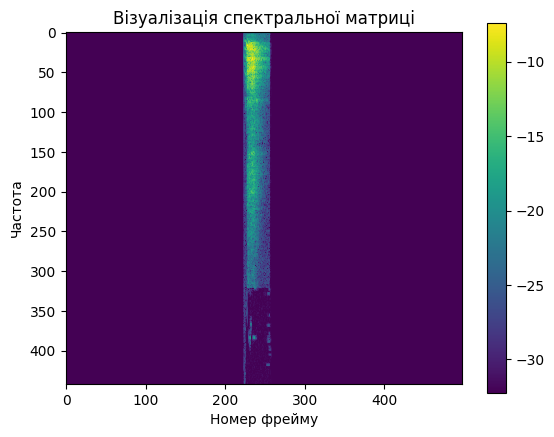

In [172]:
spect_show(spect_matrix_dog)

In [173]:
# 3. Використати функцію pooling для узагальнення та зменшення розміру спектрограми.

def pooling_audio(mat,ksize,method='max',pad=False):
    '''Non-overlapping pooling on 2D or 3D data.

    <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx).
    <method>: str, 'max for max-pooling,
                   'mean' for mean-pooling.
    <pad>: bool, pad <mat> or not. If no pad, output has size
           n//f, n being <mat> size, f being kernel size.
           if pad, output has size ceil(n/f).

    Return <result>: pooled matrix.
    '''

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(np.ceil(x/float(y)))

    if pad:
        ny=_ceil(m,ky)
        nx=_ceil(n,kx)
        size=(ny*ky, nx*kx)+mat.shape[2:]
        mat_pad=np.full(size,np.nan)
        mat_pad[:m,:n,...]=mat
    else:
        ny=m//ky
        nx=n//kx
        mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    if method=='max':
        result=np.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=np.nanmean(mat_pad.reshape(new_shape),axis=(1,3))

    return result


In [174]:
# Приклад використання
from scipy.ndimage import convolve


matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [1, 0, 5, 7]])




result = pooling_audio(matrix, (2,2))
print(result)

window_size = (20, 20)

dog_result = pooling_audio(spect_matrix_dog, window_size)

print("Початкова матриця:")
print(np.shape(spect_matrix_dog))
print(spect_matrix_dog[:10])

print("\nРезультат згортки:")
print(np.shape(dog_result))

print(dog_result[10])


[[ 6  8]
 [10 12]]
Початкова матриця:
(442, 499)
[[-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 ...
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]]

Результат згортки:
(22, 24)
[-32.2361913  -32.2361913  -32.2361913  -32.2361913  -32.2361913
 -32.2361913  -32.2361913  -32.2361913  -32.2361913  -32.2361913
 -32.2361913  -14.18564781 -18.67266876 -32.2361913  -32.2361913
 -32.2361913  -32.2361913  -32.2361913  -32.2361913  -32.2361913
 -32.2361913  -32.2361913  -32.2361913  -32.2361913 ]


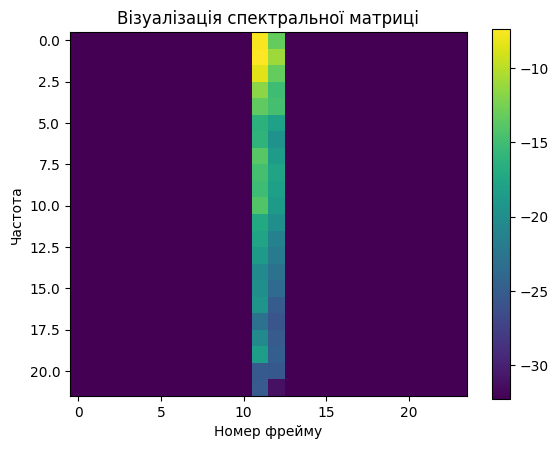

In [175]:
spect_show(dog_result)

In [176]:
# 4. За допомогою методу flaten() перетворити матрицю спектрограми у вектор для подальшого спектрального аналізу.

    # Пере спрощену матрицю, бо повна дуже довго кластеризуэться

print('spect_matrix_dog shape', np.shape(spect_matrix_dog))
print('dog_result shape', np.shape(dog_result))
print(spect_matrix_dog)

# Перетворення матриці спектрограми у вектор стовбець
vector_dog = dog_result.flatten().reshape(-1, 1)  # Зміна форми для кластеризації


print('vector_dog shape', np.shape(vector_dog))
print(vector_dog[0:10])

spect_matrix_dog shape (442, 499)
dog_result shape (22, 24)
[[-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 ...
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]
 [-32.2361913 -32.2361913 -32.2361913 ... -32.2361913 -32.2361913
  -32.2361913]]
vector_dog shape (528, 1)
[[-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]]


In [177]:
## Стандартизація

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

print(vector_dog[:6])

scaler = StandardScaler()
vector_dog = scaler.fit_transform(vector_dog)
print(vector_dog[:6])

scaler = MinMaxScaler()
vector_dog = scaler.fit_transform(vector_dog)
print(vector_dog[:6])

# Нормалайзер не використовуэмо бо дуже радиально кластеризується

# scaler = Normalizer()
# vector_dog = scaler.fit_transform(vector_dog)
# print(vector_dog[:6])

[[-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]
 [-32.2361913]]
[[-0.28057316]
 [-0.28057316]
 [-0.28057316]
 [-0.28057316]
 [-0.28057316]
 [-0.28057316]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Labels: [0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


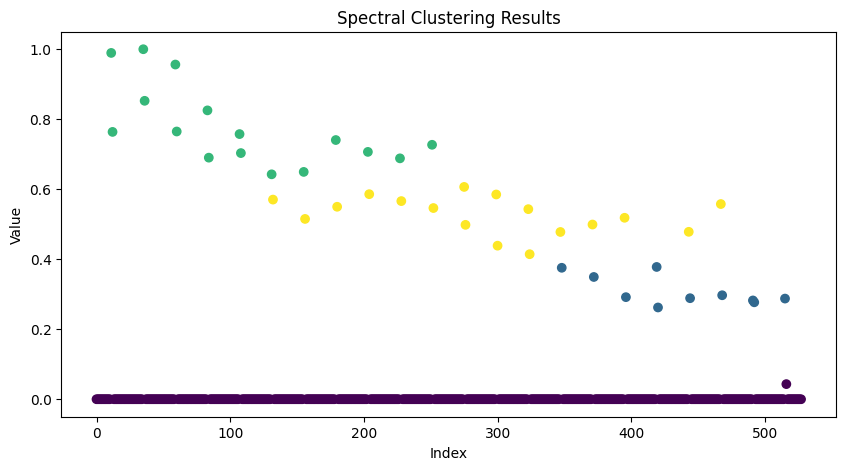

In [178]:
# 5. Використати функцію SpectralClustering бібліотеки sklearn для кластеризації отриманих даних (аналогічно до ДЗ теми №1).

    # кращі результати при кластеризації на 4 кластери

from sklearn.cluster import SpectralClustering

# Ініціалізація SpectralClustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')

# Навчання моделі і передбачення кластерів
labels = spectral.fit_predict(vector_dog)

# Перегляд результатів кластеризації
print("Labels:", labels)

# Для візуалізації результатів, ви можете використовувати matplotlib
plt.figure(figsize=(10, 5))
plt.title('Spectral Clustering Results')
plt.scatter(range(len(vector_dog)), vector_dog, c=labels, cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

## Другий звук - "спів пташок"

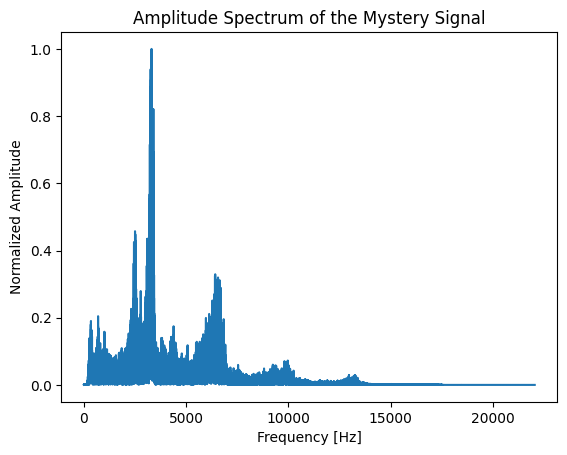

Dominant Frequencies:  [3229.2 3229.4 3229.6 3231.  3231.2 3231.4 3237.6 3237.8 3238.8 3239. ]


In [179]:
import numpy as np
from scipy.fft import fft

mystery_signal = y2
num_samples = len(mystery_signal)
sampling_rate = sr

# Perform the Fourier Transform on the mystery signal
mystery_signal_fft = fft(mystery_signal)

# Compute the amplitude spectrum
amplitude_spectrum = np.abs(mystery_signal_fft)

# Normalize the amplitude spectrum
amplitude_spectrum = amplitude_spectrum / np.max(amplitude_spectrum)

# Compute the frequency array
freqs = np.fft.fftfreq(num_samples, 1 / sampling_rate)

# Plot the amplitude spectrum in the frequency domain
plt.plot(freqs[:num_samples // 2], amplitude_spectrum[:num_samples // 2])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Normalized Amplitude")
plt.title("Amplitude Spectrum of the Mystery Signal")
plt.show()

# Find the dominant frequencies
threshold = 0.6
dominant_freq_indices = np.where(amplitude_spectrum[:num_samples // 2] >= threshold)[0]
dominant_freqs = freqs[dominant_freq_indices]

print("Dominant Frequencies: ", dominant_freqs[:10])

In [180]:
spect_matrix_birds = spectrogram(y2, sr2)

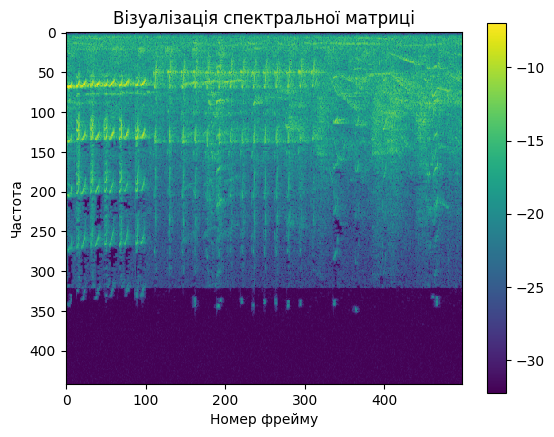

In [181]:
spect_show(spect_matrix_birds)

Початкова матриця:
(442, 499)

Результат згортки:
(22, 24)


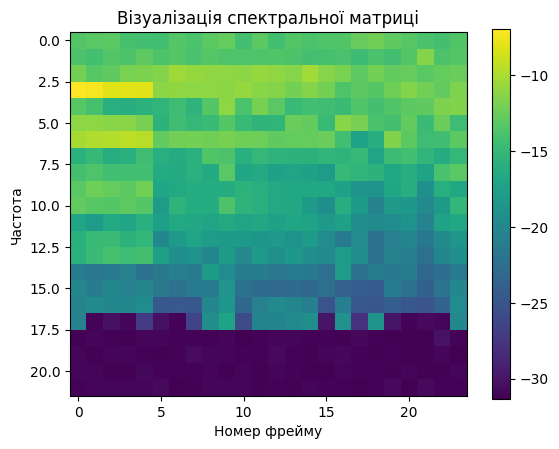

In [182]:
birds_result = pooling_audio(spect_matrix_birds, window_size)

print("Початкова матриця:")
print(np.shape(spect_matrix_birds))

print("\nРезультат згортки:")
print(np.shape(birds_result))

spect_show(birds_result)

In [183]:
# 4. За допомогою методу flaten() перетворити матрицю спектрограми у вектор для подальшого спектрального аналізу.

print('birds_result shape', np.shape(birds_result))
print(birds_result[5])

# Перетворення матриці спектрограми у ве ктор стовбець
vector_birds = birds_result.flatten().reshape(-1, 1)  # Зміна форми для кластеризації


print('vector_birds shape', np.shape(vector_birds))
print(vector_birds[:5])

birds_result shape (22, 24)
[-11.08188228 -11.06899839 -11.29983213 -11.32371682 -11.98391848
 -15.5552607  -14.41805993 -15.1394593  -14.73090999 -13.40350777
 -14.88033738 -15.46974348 -15.36885765 -12.54288388 -12.79974428
 -14.90652555 -11.34625896 -12.00706438 -13.97033242 -14.11675993
 -12.84670248 -14.69995129 -12.55152598 -14.5230961 ]
vector_birds shape (528, 1)
[[-13.46188304]
 [-13.23495412]
 [-13.13005908]
 [-14.10322337]
 [-14.22170494]]


In [184]:
## Стандартизація

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
print(vector_birds[:6])

scaler = StandardScaler()
vector_birds = scaler.fit_transform(vector_birds)
print(vector_birds[:6])

scaler = MinMaxScaler()
vector_birds = scaler.fit_transform(vector_birds)
print(vector_birds[:6])

# Нормалайзер не використовуэмо бо дуже радиально кластеризується

# scaler = Normalizer()
# vector_birds = scaler.fit_transform(vector_birds)
# print(vector_birds[:6])

[[-13.46188304]
 [-13.23495412]
 [-13.13005908]
 [-14.10322337]
 [-14.22170494]
 [-14.33482677]]
[[0.83822892]
 [0.87141529]
 [0.88675528]
 [0.74443849]
 [0.7271116 ]
 [0.71056852]]
[[0.73355116]
 [0.74287067]
 [0.74717849]
 [0.70721261]
 [0.70234682]
 [0.69770113]]


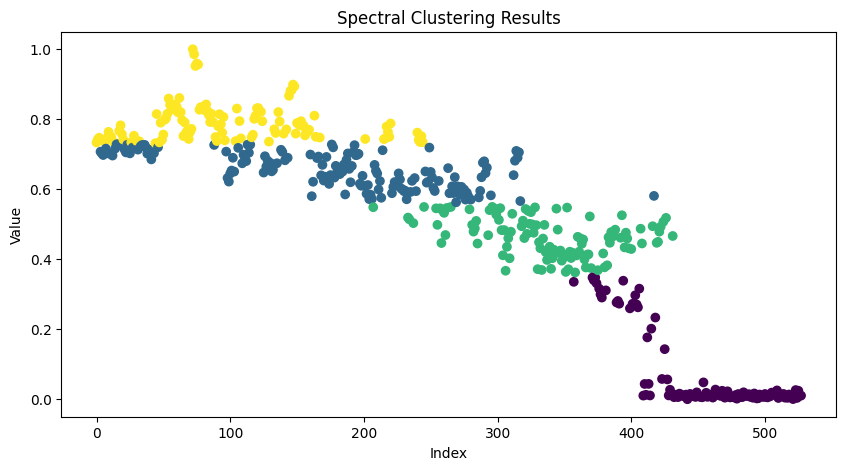

In [185]:
# 5. Використати функцію SpectralClustering бібліотеки sklearn для кластеризації отриманих даних (аналогічно до ДЗ теми №1).

    # кращі результати при кластеризації на 4 кластери

from sklearn.cluster import SpectralClustering

# Ініціалізація SpectralClustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')

# Навчання моделі і передбачення кластерів
labels = spectral.fit_predict(vector_birds)

# Перегляд результатів кластеризації
# print("Labels:", labels)

# Для візуалізації результатів, ви можете використовувати matplotlib
plt.figure(figsize=(10, 5))
plt.title('Spectral Clustering Results')
plt.scatter(range(len(vector_birds)), vector_birds, c=labels, cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Аналіз результатів

## Перший Звук - Одиночний Гавкіт Собаки

1. Часова Аналіз:
 *    Гавкіт відбувається в середині 5-секундного відрізку.
 *    Це можна чітко побачити на графіку амплітуди, де є явний пік в середині запису.

2. Частотний Аналіз:

 *    Амплітудний спектр показує, що основні частоти гавкоту знаходяться в діапазоні від 1000 до 3000 Гц.
 *    Це вказує на те, що гавкіт є середньочастотним звуком.

3. Спектральна Матриця:

 *    На спектральній матриці видно, що звук з'являється тільки в середині відрізку.
 *    Більшість часу звук відсутній.

4. Спектральна Кластеризація:
 *    Якщо розділити на 2 кластери, кластеризація чітко відокремлює звук від тиші.
 *    При розділенні на 4 кластери виділяються:
     *    діапазон відсутності звуку - 0,
     *    низької,
     *    середньої
     *    та високої амплітуди.


## Другий Звук - Спів Пташок

1. Частотний Аналіз:

 *    Амплітудний спектр показує, що основні частоти співу знаходяться в діапазоні від 0 до 10,000 Гц.
 *    З пік на 3000 Гц і невеликим піком на 7000 Гц.
 *    Це вказує на широкий частотний спектр звуку.

2. Часовий Аналіз:
 *    Спів пташок звучить протягом усього запису.

3. Спектральна Кластеризація:

 *    Спектральна кластеризація менш виражена через широкий частотний діапазон.
 *    При поділі на 4 кластери, кластери розділяються по амплітуді на рівні відрізки:
     *    до 0.25,
     *    0.25 - 0.5,
     *    0.5 - 0.75
     *    више 0.75


# Висновки

1. Перетворення Фур'є:
 *   Цей метод мав би виділити частотні ознаки звуків, які можуть бути використані для ідентифікації та кластеризації.
 *   Він дозволяє розрізнити звуки за їх частотними характеристиками, що є корисним для початкового аналізу.

2. Спектральна Кластеризація:
 *   Цей метод ефективно відокремлює звуки з чіткими частотними характеристиками (наприклад, відокремлення гавкоту від тиші)
 *   Проте, він може бути менш ефективним для звуків з широким спектром частот, таких як спів пташок, де різні частоти накладаються одна на одну.
3. Застосування:
 *   У такому вигляді ці методи не є достатньо корисними для автоматичного розпізнавання звуків чи ідентифікації джерел звуку
 *   Для покращення результатів можуть бути потрібні додаткові методи аналізу, такі як глибше вивчення частотних ознак або використання моделей машинного навчання для розпізнавання складних патернів.

